In [9]:
from google.colab import drive
drive.mount('/content/drive')
path = '/content/drive/MyDrive/elsevier/Bert-NER'
%cd $path
import utils_train as ut
import random
import torch
import torch.nn as nn
import torch.nn.functional as F
import net
from trainer import train
from transformers import BertForMaskedLM, BertTokenizer

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/elsevier/Bert-NER


In [ ]:
CLASSES = {'MATERIAL': 1,
           'MLIP': 2,
           'PROPERTY': 3,
           'SIMULATION': 4,
           'VALUE': 5,
           'O': 0}
N_DATA = 0  # 0 is all
BATCH_SIZE = 1
SEED = 1421
MAX_LENGTH = 512
CLASS_WEIGHTS = [0.1, 1, 1, 1, 1, 1]
LEARNING_RATE = 0.0001
N_EPOCHS = 2

In [ ]:
ut.seed_everything(SEED)

In [ ]:
tokenizerBERT = BertTokenizer.from_pretrained('pranav-s/MaterialsBERT', model_max_length=MAX_LENGTH)
modelBERT = BertForMaskedLM.from_pretrained('pranav-s/MaterialsBERT')
model = net.NERBERTModel(modelBERT.base_model, output_size=len(CLASSES)+1)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


vocab.txt:   0%|          | 0.00/226k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/717 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/438M [00:00<?, ?B/s]

Epoch 1
Mean training loss: 1.2956
Mean training accuracy: 0.6074
Test accuracy: 0.7484


Epoch 2
Mean training loss: 0.4548
Mean training accuracy: 0.8682
Test accuracy: 0.9245




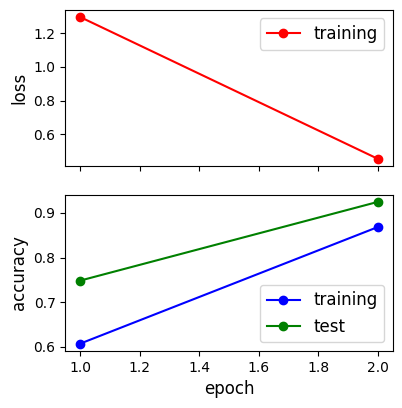

In [ ]:
model, train_losses, train_accuracies, test_accuracies, pred_classes, true_classes, pred_all, true_all, data_list = train(model, tokenizerBERT,
   'train_test_data/data_train.json', 'train_test_data/data_test.json', CLASSES, N_DATA, BATCH_SIZE, SEED, MAX_LENGTH, CLASS_WEIGHTS, LEARNING_RATE, N_EPOCHS, plot=True, save_model=True)

# Sanity check

In [ ]:
sample_id = 1
start, end = 0, -1
print(CLASSES)
print()
# print(f"Sample {sample_id}, Words {start} to {end}:")
word_list = data_list[sample_id]['words'][start:end]
print(word_list)
# print()
# print(f"True classes for Sample {sample_id}, Words {start} to {end}:")
labels = true_all[sample_id, start:end]
# print(labels)
# print(f"Predicted classes for Sample {sample_id}, Words {start} to {end}:")
predictions = pred_all[sample_id, :, :].max(dim=0)[1][start:end]
# print(predictions)
# print()
print('word', 'label', 'prediction')
for i, v in enumerate(labels):
    if (v != 0 or predictions[i] != 0) and v != len(CLASSES):
        print(word_list[i], int(v), int(predictions[i]))


{'MATERIAL': 1, 'MLIP': 2, 'PROPERTY': 3, 'SIMULATION': 4, 'VALUE': 5, 'O': 0}

['The', 'HCP', 'structure', 'of', 'zinc', '(', 'Zn', ')', 'exhibits', 'an', 'anomalous', 'c', '/', 'a', 'ratio', ',', 'a', 'factor', 'that', 'traditional', 'empirical', 'potentials', 'find', 'challenging', 'to', 'reproduce', 'accurately', ',', 'thus', 'impeding', 'thorough', 'investigations', 'of', 'its', 'property', 'and', 'behavior', 'via', 'realistic', 'atomistic', 'simulations', '.', 'The', 'advent', 'of', 'machine', 'learning', 'interatomic', 'potentials', 'in', 'recent', 'years', 'has', 'ushered', 'in', 'new', 'opportunities', 'for', 'the', 'development', 'of', 'reliable', 'Zn', 'potentials', '.', 'In', 'this', 'study', ',', 'we', 'construct', 'a', 'large', 'set', 'of', 'atomic', 'configurations', 'composed', 'of', 'Zn', 'atoms', 'and', 'calculate', 'their', 'energy', ',', 'atomic', 'forces', ',', 'and', 'stress', 'tensor', 'through', 'high', '-', 'throughput', 'density', 'functional', 'theory', 'calc